In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics

In [2]:
df=pd.read_csv('OUT 1-4 data(outlier_passed).csv')
df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),Coronavirus Cases,A,B,C
0,Brazil,BRA,-0.178534,0.190525,3.487321,59324,0.0,1.0,0.0
1,Switzerland,CHE,0.049736,-0.430016,-0.518329,29061,0.0,1.0,0.0
2,Germany,DEU,0.152279,-0.198667,-0.369352,156727,1.0,0.0,0.0
3,Denmark,DNK,-0.163517,-0.440522,-0.517006,8575,0.0,1.0,0.0
4,Spain,ESP,-0.904317,-0.311464,-0.296492,223759,1.0,0.0,0.0
5,France,FRA,-0.539019,-0.247778,-0.273693,161488,1.0,0.0,0.0
6,Japan,JPN,-0.998588,-0.060637,-0.361811,13231,0.0,1.0,0.0
7,Greece,GRC,-1.501657,-0.422622,-0.475288,2506,0.0,0.0,1.0
8,Iran,IRN,0.112651,-0.206110,0.246937,90481,0.0,0.0,0.0
9,Kuwait,KWT,1.673410,-0.443467,-0.522367,3075,0.0,0.0,1.0


In [3]:
x = df[['Population growth','Total population','Area (sq. km)','A','B','C']]
y = df['Coronavirus Cases']
lrm=LinearRegression()
lrm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
lrm.intercept_

50366.943584889945

In [5]:
lrm.coef_

array([ -7295.63005727,  -2979.0597853 ,  11846.31753502, 130108.75822464,
       -28201.44862654, -41830.43417202])

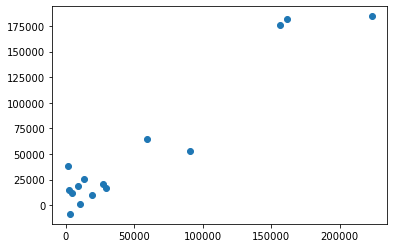

In [6]:
prediction = lrm.predict(x)
plt.scatter(y,prediction)

In [7]:
MSE = metrics.mean_squared_error(y,prediction)
MSE

405381115.26471084

In [8]:
RMSE = np.sqrt(MSE)
RMSE

20134.078455809962

In [9]:
result = smf.ols(formula='Q("Coronavirus Cases") ~\
                Q("Population growth")+\
                Q("Total population")+\
                Q("Area (sq. km)")+\
                Q("A")+\
                Q("B")+\
                Q("C")',data=df).fit()

In [10]:
result.params

Intercept                  50366.943585
Q("Population growth")     -7295.630057
Q("Total population")      -2979.059785
Q("Area (sq. km)")         11846.317535
Q("A")                    130108.758225
Q("B")                    -28201.448627
Q("C")                    -41830.434172
dtype: float64

In [11]:
result.summary()

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q("Coronavirus Cases")   R-squared:                       0.914
Model:                                OLS   Adj. R-squared:                  0.850
Method:                     Least Squares   F-statistic:                     14.25
Date:                    Wed, 27 May 2020   Prob (F-statistic):           0.000698
Time:                            15:05:03   Log-Likelihood:                -169.94
No. Observations:                      15   AIC:                             353.9
Df Residuals:                           8   BIC:                             358.8
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.037e+04   2.04e+04      2.466      0.039    3276.929    9.75e+04
Q("Population growth") -7295.6301   7829.727     -0.932      0.379   -2.54e+04    1.08e+04
Q("Total population")  -2979.0598   7919.727     -0.376      0.717   -2.12e+04    1.53e+04
Q("Area (sq. km)")      1.185e+04   8053.118      1.471      0.179   -6724.207    3.04e+04
Q("A")                  1.301e+05   2.72e+04      4.785      0.001    6.74e+04    1.93e+05
Q("B")                  -2.82e+04   2.32e+04     -1.215      0.259   -8.17e+04    2.53e+04
Q("C")                 -4.183e+04   2.58e+04     -1.618      0.144   -1.01e+05    1.78e+04
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.386
Skew:                           0.367   Prob(JB):                        0.825
Kurtosis:                       2.720   Cond. No.                         7.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""